### Investigating about mediapipe solutions

https://google.github.io/mediapipe/solutions/hands.html#max_num_hands

1. MediaPipe Hands = hand and finger tracking solution
    hand detection model - drawing the box
    hand landmark model -returns keypoints
    (solutions provided by google's - open source code)
    - STATIC_IMAGE_MODE - False: for video screen, detects and then just tracks 
    - MAX_NUM_HANDS - defautl: 2
    - MAX_NUM_HANDS & MIN_TRACKING_CONFIDENCE - default: 0.5

import libraries

In [35]:
import mediapipe as mp
import cv2 as cv
import math
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os
import keyboard
import time
import shutil
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import os
from PIL import Image
from itertools import islice

In [2]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [8]:
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
numbers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

directory = "./collected_images"

abecedario = dict(zip(letters, numbers))

image_size = 400

testing on images

In [11]:
def create_dict_images(directory, letters):

  images = {}

  for letter in letters: 
      full_directory = directory+'/'+letter
      for filename in os.listdir(full_directory):
          full_address = full_directory+'/'+filename
          # Read image and convert the BGR image to RGB
          # save filename and image in dictionary 
          images.update({filename: cv.imread(full_address, cv.COLOR_BGR2RGB)})

  return(images)

In [14]:
def print_images(image):
    plt.figure()
    plt.imshow(image)

In [31]:
image = "./mod_collected_images/train/186d1805-ee7b-4caf-9231-961cdb37a496.jpg"

In [41]:
images = create_dict_images(directory, letters)

In [ ]:
def take(n, iterable):
    return list(islice(iterable, n))

In [42]:
n_items = take(5, images.items())

error


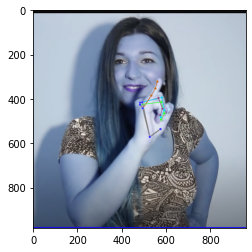

In [58]:
with mp_hands.Hands(
    static_image_mode=True, # not video yet 
    max_num_hands=2, 
    min_detection_confidence=0.7) as hands:

  for name, image in images.items():
    # Flip the image around y-axis for correct hand labelling
    try : 
      results = hands.process(cv.flip(image, 1))

      if not results.multi_hand_landmarks:
        continue
      # Draw hand landmarks of each hand.
      image_hight, image_width, _= image.shape
      annotated_image = cv.flip(image.copy(), 1)
      for hand_landmarks in results.multi_hand_landmarks:
        # Print index finger tip coordinates.
        mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    
    except:
        print('error')
    
  print_images(cv.flip(annotated_image, 1)) ## outside of loop so that i only print 1 for shorter notebook


In [59]:
results.multi_hand_landmarks

[landmark {
   x: 0.4512437582015991
   y: 0.5822664499282837
   z: -7.339803573813697e-07
 }
 landmark {
   x: 0.40193814039230347
   y: 0.5466656684875488
   z: -0.0005539217963814735
 }
 landmark {
   x: 0.37851834297180176
   y: 0.4945475161075592
   z: -0.008549859747290611
 }
 landmark {
   x: 0.3607335388660431
   y: 0.4556786119937897
   z: -0.021515676751732826
 }
 landmark {
   x: 0.36849847435951233
   y: 0.43901416659355164
   z: -0.027120498940348625
 }
 landmark {
   x: 0.48705482482910156
   y: 0.4227539002895355
   z: 0.007774860132485628
 }
 landmark {
   x: 0.41122832894325256
   y: 0.4041813611984253
   z: -0.016921645030379295
 }
 landmark {
   x: 0.391676664352417
   y: 0.45283788442611694
   z: -0.025609295815229416
 }
 landmark {
   x: 0.4024096131324768
   y: 0.4819219410419464
   z: -0.026911921799182892
 }
 landmark {
   x: 0.4974926710128784
   y: 0.4254179894924164
   z: -0.00843969825655222
 }
 landmark {
   x: 0.39493879675865173
   y: 0.40179312229156494


# video 

In [51]:
## Code for keypoint extraction:
# runs video and allows for user to select when they want extraction to take place through keyboard press
# 20 frames extracted
# no keypoints drawn onto image (see visualisation.py for that)
cap = cv.VideoCapture('../data/raw_data/abc2.mp4')
with mp_hands.Hands(
    static_image_mode = False,
    max_num_hands = 2,
    model_complexity=0,
    min_detection_confidence=0.3,
    min_tracking_confidence=0.7) as hands:

    while cap.isOpened():

        # Capture frame-by-frame (reads video feed)
        # returns boolean (read properly?) and image 
        success, image = cap.read()

        # if image isn't read properly, the window closes
        if not success:
            cap.release()
            cv.destroyAllWindows()
        # if the image is read properly, we continue with steps
        else:

            # gives option to exit video whenever you want 
            if cv.waitKey(25) & 0xFF == ord('q'):
                break

            # mediapipe detection: make prediction (process) then make image writeable
            # to draw hand annorations on the image
            image.flags.writeable = False
            image = image
            cv.imshow('frame', cv.flip(image, 1))
            results = hands.process(image)
            image.flags.writeable = True

            # draw the keypoint landmarks
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(
                        image,
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style())
            # Flip the image horizontally for a selfie-view display.
            cv.imshow('MediaPipe Hands', cv.flip(image, 1))

            # collect info for keypoint extraction
            frameWidth = cap.get(cv.CAP_PROP_FRAME_WIDTH)
            frameHeight = cap.get(cv.CAP_PROP_FRAME_HEIGHT)



    cap.release()
    cv.destroyAllWindows()

## to save keypoints

In [52]:
def make_folders(actions, no_sequences, DATA_PATH):
    for action in actions: 
        for frame_num in range(no_sequences):
            try: 
                os.makedirs(os.path.join(DATA_PATH, action, str(frame_num)))
            except:
                pass

In [53]:
# from video_extraction_functions import extract_keypoints
def extract_keypoints(results, width, height):
    keypoint_values = []
    hand_no = 0

    # as many results as hands
    # as many times through loop as hands
    if results.multi_hand_landmarks:
        for hand_no, handLandmarks in enumerate(results.multi_hand_landmarks):
            hand_no =+ 1
            for point in mp.solutions.hands.HandLandmark:
                # by default, landmarks are returned in their normalized format
                normalizedLandmark = handLandmarks.landmark[point]
                # function returns tuple of x and y coordinates 
                pixelCoordinatesLandmark = mp.solutions.drawing_utils._normalized_to_pixel_coordinates(normalizedLandmark.x, normalizedLandmark.y, width, height)
                keypoint_values.append([normalizedLandmark.x, normalizedLandmark.y, handLandmarks.landmark[point].z])
                keypoint_array = np.array(keypoint_values)
                keypoint_array_flat = keypoint_array.flatten()
        
        if (hand_no == 1) and (len(keypoint_array_flat) < 126): 
            zero_array = np.zeros(63)
            if results.multi_handedness[0].classification[0].label == 'Right':
                keypoint_array_flat = np.append(keypoint_array_flat, zero_array)
            elif results.multi_handedness[0].classification[0].label == 'Left':
                keypoint_array_flat = np.append(zero_array, keypoint_array_flat)

        return (keypoint_array_flat)

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 
# Actions that we try to detect
actions = ['hola', 'a', 'b', 'c', 'i', 'n', 'quetal', 'bien', 'tu','nombre', 'mi', 'cual','mal', 'gracias']
key = [1,2,3,4,5,6,7,8,9,'T','E','W','N','G']
key_action = dict(zip(key,actions))
# Thirty videos worth of data
no_sequences = 12
# Videos are going to be 20 frames in length
sequence_length = 10

make_folders(actions, no_sequences, DATA_PATH)

In [56]:
## Code for keypoint extraction:
# runs video and allows for user to select when they want extraction to take place through keyboard press
# 0 frames extracted
# no keypoints drawn onto image (see visualisation.py for that)
cap = cv.VideoCapture(0)
with mp_hands.Hands(
    static_image_mode = False,
    max_num_hands = ,
    model_complexity=0,
    min_detection_confidence=0.3,
    min_tracking_confidence=0.7) as hands:

    while cap.isOpened():

        # Capture frame-by-frame (reads video feed)
        # returns boolean (read properly?) and image 
        success, image = cap.read()

        # if image isn't read properly, the window closes
        if not success:
            cap.release()
            cv.destroyAllWindows()
        # if the image is read properly, we continue with steps
        else:

            # gives option to exit video whenever you want 
            if cv.waitKey(5) & 0xFF == ord('q'):
                break

            # mediapipe detection: make prediction (process) then make image writeable
            # to draw hand annorations on the image
            image.flags.writeable = False
            image = image
            cv.imshow('frame', cv.flip(image, 1))
            results = hands.process(image)
            image.flags.writeable = True

            # draw the keypoint landmarks
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(
                        image,
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style())
            # Flip the image horizontally for a selfie-view display.
            cv.imshow('MediaPipe Hands', cv.flip(image, 1))

            # collect info for keypoint extraction
            frameWidth = cap.get(cv.CAP_PROP_FRAME_WIDTH)
            frameHeight = cap.get(cv.CAP_PROP_FRAME_HEIGHT)
            # control keypoint extraction with keyboard press
            number = 
            count = 
            if keyboard.is_pressed(str(number)):
                print('keyboard pressed: {}'.format(number))
                # extracts 0 frames 
                for frame_num in range(sequence_length):
                    cv.imwrite('Frame'+str(frame_num)+'.jpg', image)
                    keypoints = extract_keypoints(results, frameWidth, frameHeight)
                    action = key_action[number]
                    npy_path = os.path.join(DATA_PATH, action, str(count), str(frame_num))
                    print(os.path.join(DATA_PATH, action, str(count), str(frame_num)))
                    np.save(npy_path, keypoints)
                    success, image = cap.read()
                    frame_num = frame_num +1

    cap.release()
    cv.destroyAllWindows()

In [57]:
results.multi_hand_landmarks

In [63]:
array_results = np.load('../data/processed_data/MP_Data/i/11/9.npy', allow_pickle=True)
print(np.array(array_results).shape)

(126,)
